In [48]:
import numpy as np
import matplotlib.pyplot as plt
import copy

path_mb_data = f"/Users/kjkelly/Dropbox/GitHub/muB_oscillation/MicroTools/MB_data/"
path_mb_data_release = f"{path_mb_data}/data_release_2018/"
mb_data_osctables = f"{path_mb_data}/MB_osc_tables/"
MiniBooNE_Signal_PANM_True = np.loadtxt(f"{mb_data_osctables}/dm-MB-events-table-TrueEnu.dat")

mb_release_mc = np.loadtxt("/Users/kjkelly/Downloads/miniboone_numunuefullosc_ntuple.txt")
MB_EReco_Bins = [0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000]
MB_EReco_Bin_Centers = np.array(MB_EReco_Bins[:-1]) + np.diff(MB_EReco_Bins)/2.

In [17]:
e_reco = mb_release_mc[:,0]/1000.
e_prod = mb_release_mc[:,1]/1000.
weights = mb_release_mc[:,3]

In [36]:
e_prod_e_int_bins = np.linspace(0, 3, 51)
h0_unnorm = np.histogram2d(e_prod, e_reco, bins=[e_prod_e_int_bins, MB_EReco_Bins], weights = mb_release_mc[:,-1])[0]
migration_matrix = copy.deepcopy(h0_unnorm)
for j in range(len(e_prod_e_int_bins)-1):
    row_sum = np.sum(h0_unnorm[j])
    if row_sum < 0.0:
        print("negative row?")
    if row_sum == 0.0:
        continue
    migration_matrix[j] = h0_unnorm[j]/row_sum

In [38]:
np.shape(migration_matrix)

(50, 13)

In [41]:
def e_prod_to_e_int(e_prod_test, weight_test, n_replications = 10):
    e_int_bin_edges = np.linspace(0, e_prod_test, n_replications+1)
    e_int_bin_centers = (e_int_bin_edges[1:] + e_int_bin_edges[:-1])/2.
    bin_weights = weight_test*np.array([(1 + 2*j)/n_replications**2 for j in range(n_replications)])
    return np.transpose([e_int_bin_centers, bin_weights])

def e_prod_to_e_int_delta(e_prod_test, weight_test, n_replications=10):
    bin_weights = np.array([weight_test/n_replications for j in range(n_replications)])
    energies = [e_prod_test for j in range(n_replications)]
    return np.transpose([energies, bin_weights])

In [58]:
decay_e_prod, decay_e_weights = np.transpose(np.concatenate([e_prod_to_e_int(e_prod[i], weights[i]) for i in range(len(e_prod))]))
decay_e_reco_distribution = np.dot((np.histogram(decay_e_prod, bins=e_prod_e_int_bins, weights=decay_e_weights)[0]), migration_matrix)

In [59]:
decay_e_prod_delta, decay_e_weights_delta = np.transpose(np.concatenate([e_prod_to_e_int_delta(e_prod[i], weights[i]) for i in range(len(e_prod))]))
decay_e_reco_distribution_delta = np.dot((np.histogram(decay_e_prod_delta, bins=e_prod_e_int_bins, weights=decay_e_weights_delta)[0]), migration_matrix)

(array([9.47497254e+07, 1.27919401e+08, 1.52326593e+08, 2.16420837e+08,
        2.49210852e+08, 2.58767404e+08, 5.62492635e+08, 1.13003756e+09,
        9.13333816e+08, 1.17874456e+09, 2.73067007e+08, 3.38306774e+07,
        8.74603446e+06]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x13fa86aa0>])

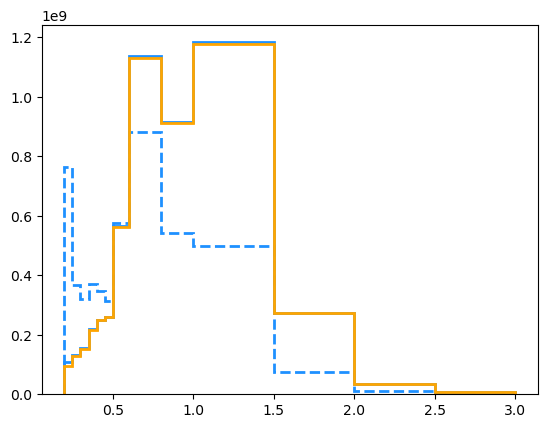

In [60]:
plt.hist(MB_EReco_Bin_Centers, bins=MB_EReco_Bins, weights=decay_e_reco_distribution_delta, histtype='step', color='dodgerblue', lw=2, label='Decay')
plt.hist(MB_EReco_Bin_Centers, bins=MB_EReco_Bins, weights=decay_e_reco_distribution, histtype='step', color='dodgerblue', lw=2, ls='--', label='Decay')
plt.hist(e_reco, bins=MB_EReco_Bins, weights=weights, histtype='step', color='orange', lw=2, label='MC')

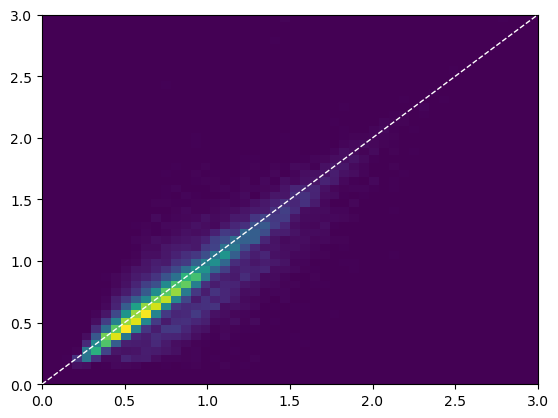

In [61]:
plt.hist2d(e_prod, e_reco, bins=[np.linspace(0, 3, 51), np.linspace(0, 3, 51)], weights = mb_release_mc[:,-1])
plt.gca().set_xlim([0, 3])
plt.gca().set_ylim([0, 3])
plt.plot([0, 3], [0, 3], lw=1, color='w', ls='--', zorder=100)

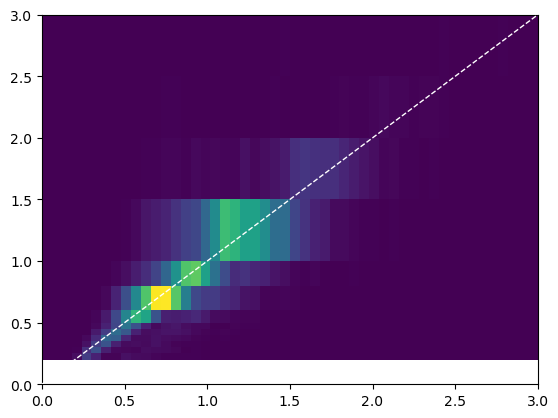

In [19]:
plt.hist2d(e_prod, e_reco, bins=[np.linspace(0, 3, 51), MB_EReco_Bins], weights = mb_release_mc[:,-1])
plt.gca().set_xlim([0, 3])
plt.gca().set_ylim([0, 3])
plt.plot([0, 3], [0, 3], lw=1, color='w', ls='--', zorder=100)

In [3]:
mb_release_mc[:10]

array([[  1202.76   ,   1118.64   ,  51884.7    , 310915.87   ],
       [  1371.7052 ,   1347.682  ,  50860.715  , 310915.87   ],
       [   597.33599,   1031.641  ,  53322.56   , 377694.89   ],
       [  1294.8813 ,   1464.5518 ,  50122.607  , 310915.87   ],
       [   470.91687,    573.99148,  52931.505  , 310915.87   ],
       [  1547.9361 ,   1623.7603 ,  49275.121  , 310915.87   ],
       [  1305.4603 ,    771.22062,  51710.564  , 310915.87   ],
       [   465.70304,    905.55912,  53659.129  , 310915.87   ],
       [   591.9677 ,    561.11032,  52637.285  , 310915.87   ],
       [   652.98903,    846.25632,  54004.383  , 310915.87   ]])

(array([0.00000000e+00, 0.00000000e+00, 1.73733938e+07, 9.66920364e+07,
        1.49666536e+08, 1.86723072e+08, 2.75491648e+08, 3.07576834e+08,
        3.28872957e+08, 3.40553811e+08, 3.56777574e+08, 3.44428217e+08,
        3.24039808e+08, 3.11340737e+08, 2.92725376e+08, 2.57577671e+08,
        2.30889603e+08, 2.14051781e+08, 1.77048118e+08, 1.77476931e+08,
        1.52499805e+08, 1.25813835e+08, 1.04882487e+08, 7.94978393e+07,
        7.30661597e+07, 5.96868104e+07, 5.21064243e+07, 4.22844521e+07,
        3.62493054e+07, 2.92681098e+07, 2.05289103e+07, 1.56196566e+07,
        1.33423937e+07, 1.02169112e+07, 6.24628304e+06, 6.16162844e+06,
        5.26541726e+06, 2.64375038e+06, 2.49900550e+06, 2.33989344e+06,
        1.32088066e+06, 1.72948456e+06, 1.01980671e+06, 1.08671551e+06,
        1.52459431e+06, 0.00000000e+00, 1.34866618e+06, 7.30204460e+05,
        8.57982820e+05, 1.56643221e+06]),
 array([   0.,   60.,  120.,  180.,  240.,  300.,  360.,  420.,  480.,
         540.,  600.,  

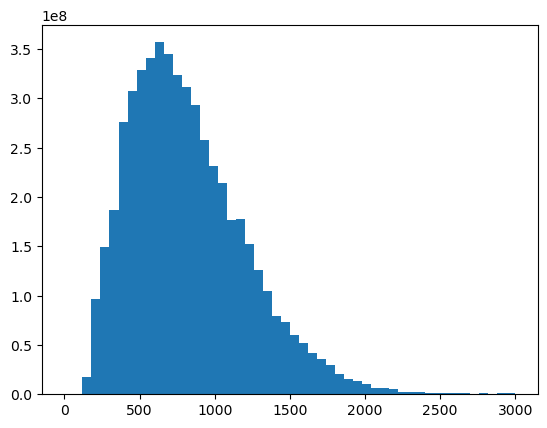

In [16]:
plt.hist(mb_release_mc[:,0], bins=np.linspace(0,3000,51), weights=mb_release_mc[:,-1])

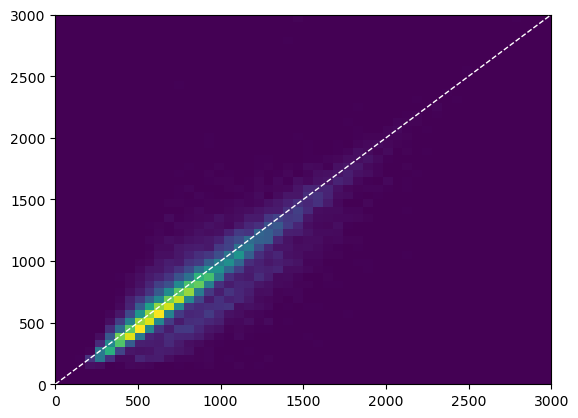

In [9]:
plt.hist2d(mb_release_mc[:,1], mb_release_mc[:,0], bins=[np.linspace(0, 3000, 51), np.linspace(0, 3000, 51)], weights = mb_release_mc[:,-1])
plt.gca().set_xlim([0, 3000])
plt.gca().set_ylim([0, 3000])
plt.plot([0, 3000], [0, 3000], lw=1, color='w', ls='--', zorder=100)

In [13]:
np.histogram2d(mb_release_mc[:,1], mb_release_mc[:,0], bins=[np.linspace(0, 3000, 51), np.linspace(0, 3000, 51)], weights = mb_release_mc[:,-1])

(array([[     0.  ,      0.  ,      0.  , ...,      0.  ,      0.  ,
              0.  ],
        [     0.  ,      0.  ,      0.  , ...,      0.  ,      0.  ,
              0.  ],
        [     0.  ,      0.  , 233175.01, ...,      0.  ,      0.  ,
              0.  ],
        ...,
        [     0.  ,      0.  ,      0.  , ...,      0.  ,      0.  ,
              0.  ],
        [     0.  ,      0.  ,      0.  , ...,      0.  ,      0.  ,
              0.  ],
        [     0.  ,      0.  ,      0.  , ...,      0.  ,      0.  ,
              0.  ]]),
 array([   0.,   60.,  120.,  180.,  240.,  300.,  360.,  420.,  480.,
         540.,  600.,  660.,  720.,  780.,  840.,  900.,  960., 1020.,
        1080., 1140., 1200., 1260., 1320., 1380., 1440., 1500., 1560.,
        1620., 1680., 1740., 1800., 1860., 1920., 1980., 2040., 2100.,
        2160., 2220., 2280., 2340., 2400., 2460., 2520., 2580., 2640.,
        2700., 2760., 2820., 2880., 2940., 3000.]),
 array([   0.,   60.,  120.,  180.,  2

In [118]:
MB_True_Bins = [0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000]
bin_centers = np.array(MB_True_Bins[:-1]) + np.diff(MB_True_Bins)/2.
#MB_True_Bins = np.loadtxt('/Users/kjkelly/Dropbox/ResearchProjects/Retired/JK_PANM_2p2h/2p2h/jk/mb-data/nue/miniboone_binboundaries_nue_lowe.txt')/1000

In [119]:
#determine bin width for an energy in a certain bin
def bw(energy):
    if energy < 0.200 or energy > 3.000:
        return 1.0
    bin_width = np.diff(MB_True_Bins)[np.digitize(energy, MB_True_Bins)-1]
    return bin_width

In [120]:
bw(2.8)

0.5

In [121]:
dm0 = MiniBooNE_Signal_PANM_True[0][0]

In [150]:
mb_data = np.array([732.0,  426.0,  444.0,  248.0,  281.0,  236.0,  201.0,  164.0,  138.0,  144.0,  188.0])
mb_bkg = np.array([527.164624,  315.423689,  349.644825,  186.211970,  261.441799,  195.534193,  203.008745,  165.664396,  118.581365, 143.989367,  201.450357])
mb_coarse_bins = np.loadtxt('/Users/kjkelly/Dropbox/ResearchProjects/Retired/JK_PANM_2p2h/2p2h/jk/mb-data/nue/miniboone_binboundaries_nue_lowe.txt')/1000
mb_coarse_binwidths = np.diff(mb_coarse_bins)
mb_coarse_bincenters = mb_coarse_bins[:-1] + mb_coarse_binwidths/2.

In [178]:
#dm0 = MiniBooNE_Signal_PANM_True[300][0]
dm0 = 0.043
new_weights = np.array([mbi[3]*np.sin(1.267*dm0*((mbi[2]/100)/(mbi[1])))**2 for mbi in mb_release_mc])

(0.0, 3.0)

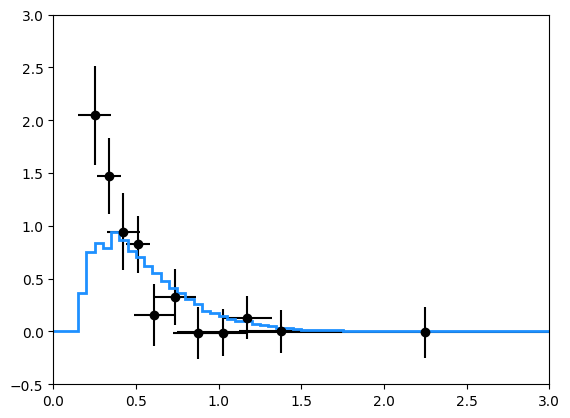

In [182]:
plt.errorbar(mb_coarse_bincenters, (mb_data - mb_bkg)/(1000*mb_coarse_binwidths), yerr=np.sqrt(0.0003*np.abs(mb_data)), xerr=mb_coarse_binwidths, fmt='o', color='k', label='MiniBooNE Data')
#plt.hist(mb_coarse_bincenters, weights=(mb_data - mb_bkg)/(1000*mb_coarse_binwidths), bins=mb_coarse_bins, histtype='step', color='k', label='MiniBooNE Data')
plt.gca().axis([0,3,-0.5,3])
plt.hist(np.transpose(mb_release_mc)[0]/1000, weights=10e-7*new_weights, bins=np.linspace(0, 3, 61), histtype='step', lw=2, color='dodgerblue', density=False)
plt.gca().set_xlim(0.0, 3.0)

In [135]:
np.sum(new_weights)

2636253908.0184164

In [136]:
np.sum(MiniBooNE_Signal_PANM_True[0][1:])

22.0403853323295

(0.0, 3.0)

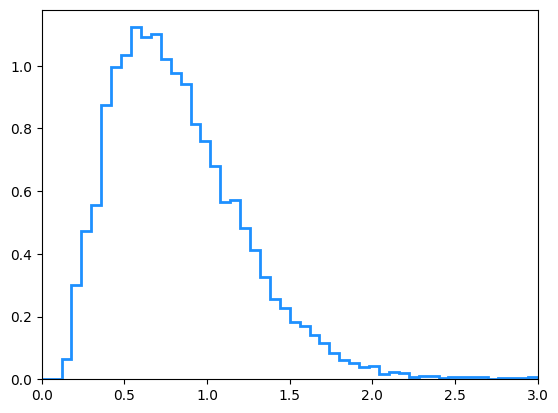

In [146]:
#plt.hist(np.transpose(mb_release_mc)[0]/1000, weights=np.transpose(mb_release_mc)[-1]/bws, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')
#plt.gca().set_xlim(0.2, 2.0)
plt.hist(np.transpose(mb_release_mc)[0]/1000, weights=new_weights, bins=np.linspace(0, 3, 51), histtype='step', lw=2, color='dodgerblue', density=True)
plt.gca().set_xlim(0.0, 3.0)

In [173]:
dm0 = MiniBooNE_Signal_PANM_True[300][0]
new_weights = np.array([mbi[3]*np.sin(1.267*dm0*((mbi[2]/100)/(mbi[1])))**2 for mbi in mb_release_mc])

(array([  427.92234988,  1663.52875654,  2451.3930376 ,  3838.33268733,
         2463.60905182,  7016.81417261,  9536.132111  , 20297.34837573,
        25903.27420354, 26475.47429715,  6619.97813439,    78.01836752,
          107.95378763]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x2ff670820>])

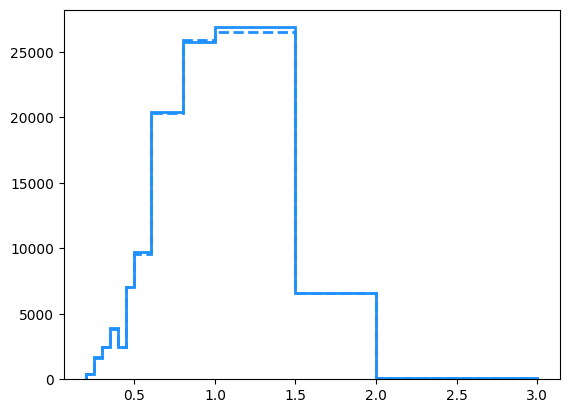

In [177]:
plt.hist(np.transpose(mb_release_mc)[1]/1000, weights=4e-5*new_weights, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')

#dm0 = MiniBooNE_Signal_PANM_True[0][0]
#wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[300][1:], bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue', ls='--')

In [3]:
LMBT = 0.4685 #Baseline length in kilometers
from scipy.special import sici, expi

def ssqAvg(Emin, Emax, L, dmsq):
    if Emin == 0.0:
        Emin = 0.000001
    xmin, xmax = Emin/(1.267*dmsq*L), Emax/(1.267*dmsq*L)
    return 1.267*dmsq*L/(Emax-Emin)*((xmax*np.sin(1.0/xmax)**2 - sici(2.0/xmax)[0]) - (xmin*np.sin(1.0/xmin)**2 - sici(2.0/xmin)[0]))

def expdecayAvg(Emin, Emax, L, gm):
    if Emin == 0.0:
        Emin = 0.000001
    xmin, xmax = (16*np.pi/((1.267*gm**2)*L))*Emin, (16*np.pi/((1.267*gm**2)*L))*Emax
    return 1/(Emax-Emin)*((Emax-Emin) - Emax*np.exp(-1/xmax) + Emin*np.exp(-1/xmin) - (1.267*gm**2)*L/(16*np.pi)*(expi(-1/xmax) - expi(-1/xmin)))

In [4]:
dm0 = MiniBooNE_Signal_PANM_True[0][0]
np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])

array([0.0074805 , 0.00916729, 0.01085068, 0.01253203, 0.01421206,
       0.01589119, 0.01833243, 0.02314081, 0.02991538, 0.04076825,
       0.05785083, 0.07478753, 0.09165872])

In [39]:
len(MiniBooNE_Signal_PANM_True)

501

(array([ 5684.9835246 ,  7675.1640822 ,  9139.5955758 , 12985.2502308 ,
        14952.6511254 , 15526.0442688 , 33749.5581156 , 67802.25376082,
        54800.02893304, 70724.67386345, 16384.02045001,  2029.8406434 ,
          524.7620676 ]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x2fb5fe3e0>])

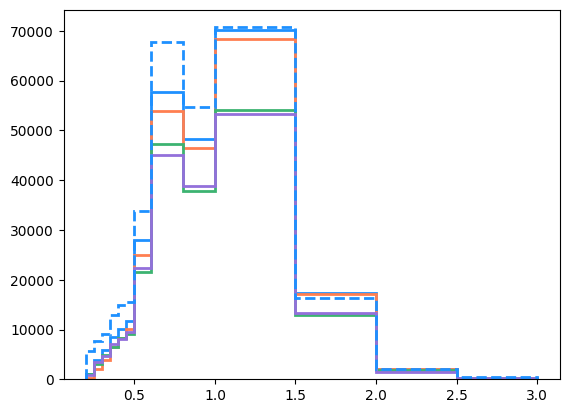

In [40]:
dm0 = MiniBooNE_Signal_PANM_True[0][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[0][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')

dm0 = MiniBooNE_Signal_PANM_True[200][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[200][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='coral')

dm0 = MiniBooNE_Signal_PANM_True[400][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[400][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='mediumseagreen')

dm0 = MiniBooNE_Signal_PANM_True[500][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[500][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='mediumpurple')

plt.hist(np.transpose(mb_release_mc)[0]/1000, weights=6e-5*np.transpose(mb_release_mc)[-1], bins=MB_True_Bins, histtype='step', color='dodgerblue', ls='--', lw=2)

(array([0.09676282, 0.30346265, 0.46201402, 0.65008211, 0.77583172,
        0.8523693 , 1.06171427, 1.11846805, 0.9036489 , 0.51595251,
        0.12976906, 0.01617118, 0.00286536]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x127fb0b20>])

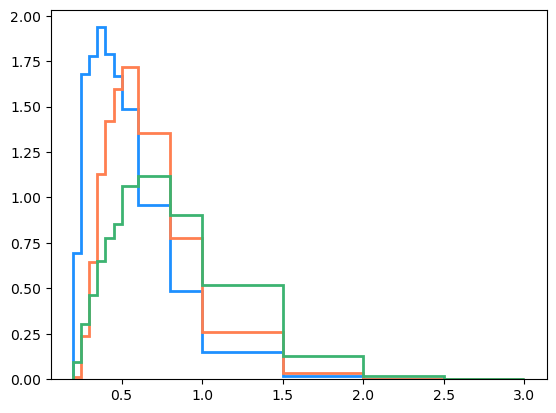

In [21]:
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[0][1:], bins=MB_True_Bins, histtype='step', density=True, lw=2, color='dodgerblue')
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[200][1:], bins=MB_True_Bins, histtype='step', density=True, lw=2, color='coral')
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[400][1:], bins=MB_True_Bins, histtype='step', density=True, lw=2, color='mediumseagreen')

(array([9.02844905e+02, 2.78139658e+03, 4.84255171e+03, 1.21051158e+04,
        2.93565066e+03, 4.74950463e+04, 1.17684285e+04, 2.97795067e+04,
        8.10994288e+04, 2.19805528e+04, 2.37672354e+04, 1.33158689e+02,
        5.53296717e+01]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x1373d0ac0>])

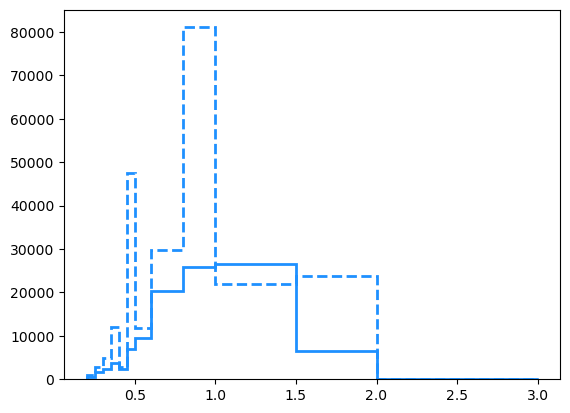

In [42]:
dm0 = MiniBooNE_Signal_PANM_True[300][0]
wgt_adjust = np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[300][1:], bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[300][1:]*wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue', ls='--')

#dm0 = MiniBooNE_Signal_PANM_True[200][0]
#wgt_adjust = np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
#plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[200][1:]*wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='coral')

#dm0 = MiniBooNE_Signal_PANM_True[400][0]
#wgt_adjust = np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
#plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[400][1:]*wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='mediumseagreen')

